# Integrating Roboflow Into Your Application

To use Roboflow with your application, you need to connect your application to a Roboflow inference engine (i.e. our hosted API, a Docker container running an inference server). Then, you can build logic on that references predictions made by your model.

![image info](https://media.roboflow.com/quickstart/inference-integration.png?updatedAt=1678743142514[/img)


You can take your Roboflow models to (nearly) any destination.

In this guide, we'll talk through using:

1. Our hosted API and;
2. Local deployment with our Docker container;

Let's get started!

-------------------

## Hosted API

Roboflow hosts models on infintely scaling cloud servers. If you do not have low inference latency requirements (sub 500 ms) and you do not need privately hosted inference, the hosted inference servers are ideal.

Models are hosted at:

* https://classify.roboflow.com
* https://detect.roboflow.com
* https://outline.roboflow.com

_Note: In our "model-types" Notebook, we were hitting the hosted API in the python SDK for `model.predict()`_




In [1]:
#log into Roboflow
import roboflow
roboflow.login()

You are already logged into Roboflow. To make a different login, run roboflow.login(force=True).


In [2]:
#you can use the python SDK to post images at the Roboflow Inference APIs, like we did before
img_url = "https://media.roboflow.com/quickstart/aerial_drone.jpeg?updatedAt=1678743716455"
universe_model_url = "https://universe.roboflow.com/brad-dwyer/aerial-solar-panels/model/6"
model = roboflow.load_model(model_url=universe_model_url)

loading Roboflow workspace...
loading Roboflow project...


In [3]:
model.base_url

'https://detect.roboflow.com/'

In [4]:
model.api_url

'https://detect.roboflow.com/aerial-solar-panels/6?api_key=403Vs16UyCFDxDE7ScZA&name=YOUR_IMAGE.jpg&overlap=30&confidence=40&stroke=1&labels=false&format=json'

In [5]:
pred = model.predict(img_url, hosted=True)
pred.json()["predictions"][0:2]

[{'x': 1896.0,
  'y': 396.0,
  'width': 170.0,
  'height': 196.0,
  'confidence': 0.9106213450431824,
  'class': 'solar-panels',
  'image_path': 'https://media.roboflow.com/quickstart/aerial_drone.jpeg?updatedAt=1678743716455',
  'prediction_type': 'ObjectDetectionModel'},
 {'x': 1966.0,
  'y': 861.5,
  'width': 206.0,
  'height': 339.0,
  'confidence': 0.8960927724838257,
  'class': 'solar-panels',
  'image_path': 'https://media.roboflow.com/quickstart/aerial_drone.jpeg?updatedAt=1678743716455',
  'prediction_type': 'ObjectDetectionModel'}]

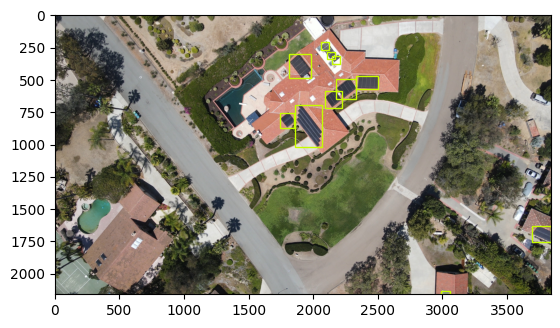

In [6]:
#you can also infer on a local image
pred = model.predict("aerial_drone.png")
pred.plot()

In [7]:
#the python SDK is just a wrapper around the hosted API URLs where you can pass images via URL or base64 encoded string
#fun fact, the rest of the Roboflow SDKs use these same URLs, and you can deploy them in differnt languages and servers

#example of posting at the URL directly
import requests
import urllib

img_url = "https://media.roboflow.com/quickstart/aerial_drone.jpeg?updatedAt=1678743716455"
request_url = model.api_url + "&image=" + urllib.parse.quote_plus(img_url)
resp = requests.post(request_url)


In [8]:
resp.json()["predictions"][0:2]

[{'x': 1896.0,
  'y': 396.0,
  'width': 170.0,
  'height': 196.0,
  'confidence': 0.9106213450431824,
  'class': 'solar-panels'},
 {'x': 1966.0,
  'y': 861.5,
  'width': 206.0,
  'height': 339.0,
  'confidence': 0.8960927724838257,
  'class': 'solar-panels'}]

### Local Deployment

You can also deploy Roboflow Inference Servers locally via docker containers. These containers accelerate inference on CPU and NVIDIA GPUs.

Deployment Docs: https://docs.roboflow.com/inference-2.0-beta

Note: the quickstart setup had quickly spun up a local server for us at "http://localhost:9001". We were invoking this inference for lower latency in `model.webcam()`


In [9]:
!curl http://localhost:9001

{
    "server": {
        "package": "@roboflow/inference-server",
        "version": "1.4.0"
    },
    "roboflow": {
        "package": "roboflow-node",
        "version": "0.2.25"
    }
}

In [10]:
request_url = request_url.replace("https://detect.roboflow.com", "http://localhost:9001")

In [11]:
img_url = "https://media.roboflow.com/quickstart/aerial_drone.jpeg?updatedAt=1678743716455"
request_url = model.api_url + "&image=" + urllib.parse.quote_plus(img_url)
resp = requests.post(request_url)

In [12]:
resp.json()["predictions"][0:2]

[{'x': 1896.0,
  'y': 396.0,
  'width': 170.0,
  'height': 196.0,
  'confidence': 0.9106213450431824,
  'class': 'solar-panels'},
 {'x': 1966.0,
  'y': 861.5,
  'width': 206.0,
  'height': 339.0,
  'confidence': 0.8960927724838257,
  'class': 'solar-panels'}]

## Integrating Business Logic

The value of your computer vision model is unlocked by hooking it up to the rest of your business's logic.

As a next step, we have prepared various next step solutions for integrating your model into an application, including:

* Counting objects;
* Measuring object distance;
* Sending texts;
* Sending emails;
* Controlling OBS and;
* And more

Check them out on [Roboflow Templates](https://roboflow.com/templates).

![Roboflow Templates homepage](https://media.roboflow.com/quickstart/Screenshot_2023-03-08_at_11.55.54.png?ik-sdk-version=javascript-1.4.3&updatedAt=1678276565358)